# Logistic Regression (MNIST)
### (preliminary: logistic model)
## 1. Library, Data, Preprocessing (Split, Normalize)
## 2. Solve logistic model with Pytorch
## 3. Show the result with confusion matrix

# Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

print("device: gpu") if torch.cuda.is_available() else print("device: cpu") #cpu, gpu 판별

device: cpu


# Hyper parameter setting

In [2]:
# hypter parameter setting
learning_rate = 1e-1 # 0.1
epochs = 50
batch_size = 60000 # gradient descent 
display_step = 10 #몇번의 epoch 마다 확인을 할래?

# Load data

len(train_data):  60000
len(test_data):  10000
data shape:  torch.Size([1, 28, 28])
label:  5


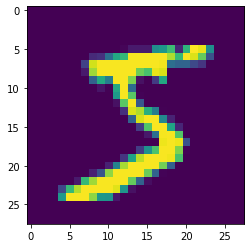

In [3]:
# load data MNIST 데이터는 손글씨 데이터셋
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)
                        #어디다놓을래?, train=True 60000개 False면 test로 10000개제공, 불러올때 tensor로 변환, ?,다운로드 
# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

## Pre-process

data shape: torch.Size([60000, 1, 28, 28])
label: tensor([5, 7, 5,  ..., 0, 6, 2])


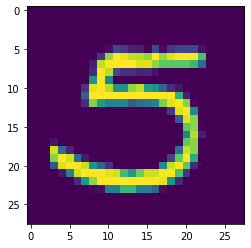

In [4]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

# Make model with pytorch (Gradient Descent)

In [5]:
# model
model = nn.Linear(784,10) #784=28*28 (데이터의 크기=28), softmax 함수를 쓸거여서 10, 
model = model.to(device)
model.train()

# loss and optimizer 
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate) #L2쓸려면 파라미터에 weight_decay=True

loss_array = []

# train the model
for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader):
        optimizer.zero_grad() #pytorch
        
        x = data.to(device)
        x = x.view(batch_size, -1)
        y = label.to(device)
        
        output = model(x)

        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
            
        loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 10 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

Epoch: 1 \Loss: tensor(2.3366, grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(1.5628, grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(1.1984, grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(1.0024, grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(0.8825, grad_fn=<NllLossBackward>)


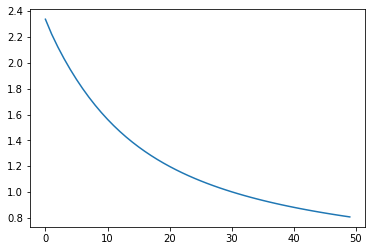

In [6]:
plt.figure()
plt.plot(loss_array)
plt.show()

# Test

In [7]:
# test
model.eval()
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 784)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1)
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)

total 10000
correct tensor(8459.)
accuracy tensor(0.8459)


# Confusion matrix

In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
    
prediction_array = np.array(prediction_list[0].cpu())
label_array = np.array(label_list[0].cpu())

print("prediction :", prediction_array.shape)
print("true label :", label_array.shape)

confusion_matrix(
    label_array,
    prediction_array) # y_pred

prediction : (10000,)
true label : (10000,)


array([[ 938,    0,    4,    7,    0,    4,   18,    1,    8,    0],
       [   0, 1080,    7,    3,    1,    2,    4,    0,   38,    0],
       [  17,   35,  823,   33,   20,    0,   32,   23,   47,    2],
       [   5,    5,   25,  874,    1,   23,    9,   23,   31,   14],
       [   3,   13,    4,    0,  840,    1,   21,    1,   11,   88],
       [  36,   23,    9,  130,   27,  549,   36,   16,   42,   24],
       [  22,   10,   16,    2,   14,   18,  868,    0,    8,    0],
       [   5,   46,   25,    0,   14,    0,    3,  885,   10,   40],
       [  11,   25,   12,   66,   11,   15,   17,   13,  774,   30],
       [  16,   17,   11,   12,   63,    8,    3,   38,   13,  828]])